In [1]:
# Import needed packages and functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import the data
Coffee = pd.read_csv('coffee.csv')

# Filter out the coffee that is missing scores
Coffee = Coffee[Coffee['total_cup_points']!=0]
Coffee.shape

(1338, 43)

In [3]:
# Summarize the numerical features
Coffee.describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1337.000000,1338.000000,1108.000000,1108.000000,1108.000000
mean,82.151203,154.092676,7.572362,7.526046,7.406614,7.541338,7.523117,7.523632,9.842227,9.842459,9.864058,7.508984,0.088356,0.479821,0.173523,3.557549,1751.029843,1799.708197,1775.369020
std,2.686862,129.993747,0.315916,0.341382,0.350304,0.319173,0.307815,0.353630,0.485183,0.715296,0.554207,0.426843,0.048298,2.550603,0.832419,5.314357,8673.348986,8672.712024,8672.533233
min,59.830000,0.000000,5.080000,6.080000,6.170000,5.250000,5.080000,5.250000,6.000000,0.000000,1.330000,5.170000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,81.102500,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,82.500000,172.500000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,83.670000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,90.580000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [4]:
# Summarize the categorical features
Coffee.describe(include=['O'])

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,grading_date,owner_1,variety,processing_method,color,expiration,certification_body,certification_address,certification_contact,unit_of_measurement
count,1338,1331,1337,979,275,1020,1181,1129,1112,1279,...,1338,1331,1112,1169,1120,1338,1338,1338,1338,1338
unique,2,315,36,571,227,459,846,281,396,356,...,567,319,29,5,4,566,26,32,29,2
top,Arabica,juan luis alvarado romero,Mexico,various,1,beneficio ixchel,0,"unex guatemala, s.a.",1100,huila,...,"July 11th, 2012",Juan Luis Alvarado Romero,Caturra,Washed / Wet,Green,"July 11th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m
freq,1310,155,236,47,18,90,77,86,43,112,...,25,155,255,815,869,25,313,293,295,1156


In [5]:
# Select features
X = Coffee[['uniformity', 'sweetness']]
y = pd.get_dummies(Coffee['species'], drop_first=True) 
# Dummy variables are not required for DecisionTreeClassifier but are required for 
# plot_decision_boundary

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


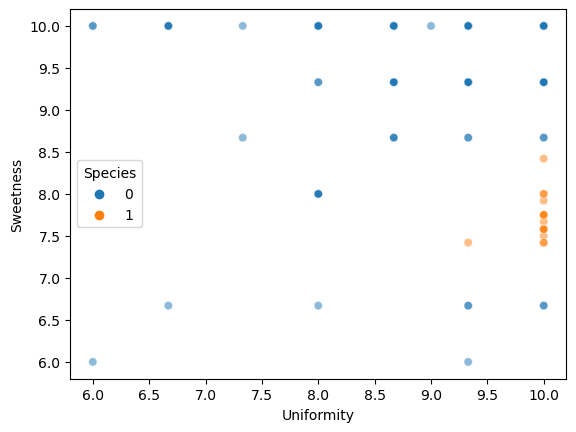

In [6]:
# Scatter plot of the input features colored by species of coffee
p1 = sns.scatterplot(data=X_train, x='uniformity', y='sweetness', hue=y_train['Robusta'], alpha=0.5)
p1.set(xlabel='Uniformity', ylabel='Sweetness')
p1.get_legend().set_title('Species')

In [7]:
# Initialize the tree and fit the tree
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.625, 0.9, 'sweetness <= 8.545\ngini = 0.036\nsamples = 936\nvalue = [919, 17]'),
 Text(0.5, 0.7, 'uniformity <= 9.665\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.25, 0.5, 'uniformity <= 8.665\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.375, 0.3, 'sweetness <= 7.045\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'sweetness <= 7.045\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 906\nvalue = [906, 0]')]

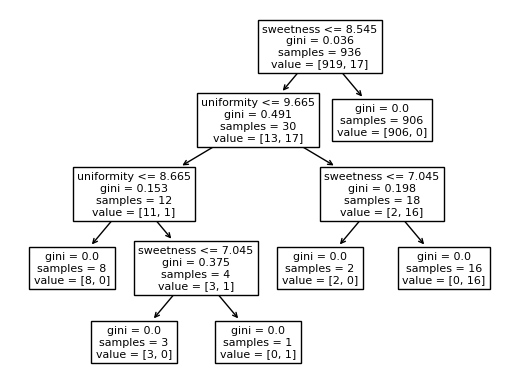

In [8]:
# Plot the fitted tree
plot_tree(DTC, feature_names=X_train.columns)

/nix/store/msas3yllgpa9cv1srn6gxry7ygra9hwm-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


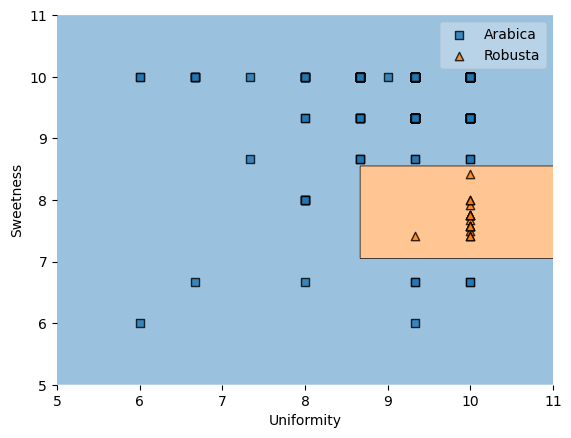

In [9]:
# Plot the decision boundary
ax = plot_decision_regions(X_train.to_numpy(), 
                           np.ravel(y_train), clf=DTC, legend=0)
plt.xlabel('Uniformity')
plt.ylabel('Sweetness')


# Change the labels to species names
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, 
          ['Arabica', 'Robusta'], 
           framealpha=0.3, scatterpoints=1)

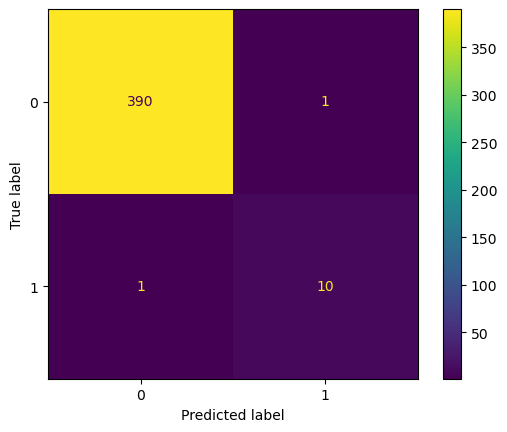

In [10]:
# Predict for the test set and plot the confusion matrix
y_pred = DTC.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [11]:
# Predict the probabilities 
# (since the tree's leaves are all pure, the values are all 0 and 1)
DTC.predict_proba(X_train)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])